In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import openface
from automakeup import dlib_predictor_path
from automakeup.face import face_extraction, bounding
from imagine.color.conversion import BgrToRgb
from importlib import resources

In [2]:
img_path = "face.jpg"

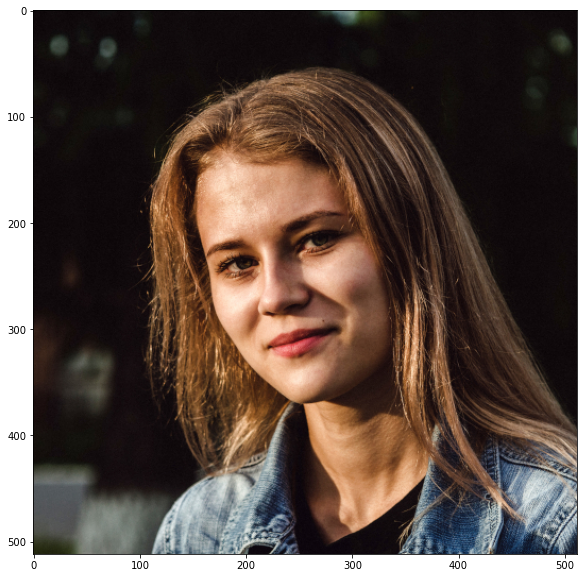

In [3]:
image = BgrToRgb(cv2.imread(img_path))
plt.figure(figsize=(10,10))
plt.imshow(image)

In [4]:
with resources.path("automakeup.resources", dlib_predictor_path) as dlib_path:
    estimator = openface.AlignDlib(str(dlib_path))

In [5]:
extractor1 = face_extraction.SimpleFaceExtractor(512, interpolation=cv2.INTER_CUBIC)
extractor2 = face_extraction.OpenFaceExtractor(512, estimator)
bb_finder = bounding.OpenfaceBoundingBoxFinder(estimator)

In [6]:
bb = bb_finder.find(image)

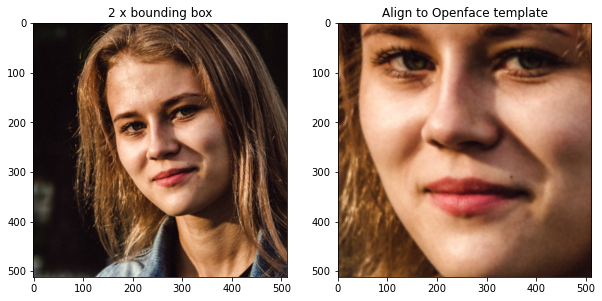

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(extractor1.extract(image, bb))
axs[0].title.set_text("2 x bounding box")
axs[1].imshow(extractor2.extract(image, bb))
axs[1].title.set_text("Align to Openface template")